[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


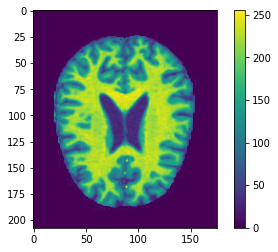

"\nplt.axhline(np.average(np.max(non_dem_eigdata,axis=1) - np.min(non_dem_eigdata,axis=1)),label = 'non_avg',color='red')\nplt.plot(np.max(non_dem_eigdata,axis=1) - np.min(non_dem_eigdata,axis=1),'o',label = 'non')\nplt.axhline(np.average(np.max(very_mild_dem_eigdata,axis=1) - np.min(very_mild_dem_eigdata,axis=1)),label = 'very mild_avg',color='green')\nplt.plot(np.max(very_mild_dem_eigdata,axis=1) - np.min(very_mild_dem_eigdata,axis=1),'o',label = 'very mild')\nplt.axhline(np.average(np.max(mild_dem_eigdata,axis=1) - np.min(mild_dem_eigdata,axis=1)),label = 'mild_avg',color='blue')\nplt.plot(np.max(mild_dem_eigdata,axis=1) - np.min(mild_dem_eigdata,axis=1),'o',label = 'mild')\nplt.axhline(np.average(np.max(mod_dem_eigdata,axis=1) - np.min(mod_dem_eigdata,axis=1)),label = 'moderate_avg',color='black')\nplt.plot(np.max(mod_dem_eigdata,axis=1) - np.min(mod_dem_eigdata,axis=1),'o',label = 'moderate')\nplt.legend()\nplt.show()\nplt.show()\n"

In [23]:
'''
Code for classify the image for 4 different class of Dimential Patient
Here we map the image into a 2 by 2 Inertia Tensor, then calculate Eigen Value from it 
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

#############
# ############# Creating Position Matrix)############################

Im_mat = cv2.imread("Alzheimer_s_Dataset/test/NonDemented/non_1.jpg", 0)
print(Im_mat)
plt.imshow(Im_mat)
plt.colorbar()
plt.show()
nx = Im_mat.shape[0]
ny = Im_mat.shape[1]
x = np.linspace(0, 10, ny)
y = np.linspace(10 * nx / ny, 0 * nx / ny, nx)
pos_mat = np.zeros([nx, ny, 2])
for i in range(nx):
    for j in range(ny):
        pos_mat[i, j, 0] = x[j]
        pos_mat[i, j, 1] = y[i]

#################### Defineing file name#################################

mod_dem_filename = "modereateDemo_eig.txt"
non_dem_filename = "nonDemo_eig.txt"
mild_dem_filename = "mildDemo_eig.txt"
very_mild_dem_filename = "verymildDemo_eig.txt"

############################Moderate Dimentia################################
if not os.path.exists(mod_dem_filename):  # if not file exist then run
    f_mod = open(mod_dem_filename, "w")
    for i in range(1,13):
        Im_mat = cv2.imread(
            f"Alzheimer_s_Dataset/test/ModerateDemented/moderate_{i}.jpg", 0
        )
#         print(Im_mat)
#         print(Im_mat)
#         plt.imshow(Im_mat)
#         plt.colorbar()
#         plt.show()

        I = np.zeros([2, 2])
        for i in range(nx):
            for j in range(ny):
                m = Im_mat[i, j]
                rx = pos_mat[i, j, 0]
                ry = pos_mat[i, j, 1]
                I[0, 0] += m * ry**2
                I[0, 1] += -m * rx * ry
                I[1, 1] += m * rx**2

        I[1, 0] = I[0, 1]

        ## finding eigen value

        eig_val_I, eig_vec_I = np.linalg.eig(I)
        f_mod.write(f"{eig_val_I[0]}  {eig_val_I[1]}\n")
        print("eigen value of inertia tensor of the given figure is =", eig_val_I, end = '\r')
    ##
    f_mod.close()

############################Non Dimentia################################
if not os.path.exists(non_dem_filename):  # if not file exist then run
    f_non = open(non_dem_filename, "w")
    for i in range(1,641):
        Im_mat = cv2.imread(
            f"Alzheimer_s_Dataset/test/NonDemented/non_{i}.jpg", 0
        )

        I = np.zeros([2, 2])
        for i in range(nx):
            for j in range(ny):
                m = Im_mat[i, j]
                rx = pos_mat[i, j, 0]
                ry = pos_mat[i, j, 1]
                I[0, 0] += m * ry**2
                I[0, 1] += -m * rx * ry
                I[1, 1] += m * rx**2

        I[1, 0] = I[0, 1]

        ## finding eigen value

        eig_val_I, eig_vec_I = np.linalg.eig(I)
        f_non.write(f"{eig_val_I[0]}  {eig_val_I[1]}\n")
        print("eigen value of inertia tensor of the given figure is =", eig_val_I,end='\r')
    f_non.close()

############################Mild Dimentia################################
if not os.path.exists(mild_dem_filename):
    f_mild = open(mild_dem_filename, "w")
    for i in range(1,180):
        Im_mat = cv2.imread(
            f"Alzheimer_s_Dataset/test/MildDemented/mild_{i}.jpg", 0
        )

        I = np.zeros([2, 2])
        for i in range(nx):
            for j in range(ny):
                m = Im_mat[i, j]
                rx = pos_mat[i, j, 0]
                ry = pos_mat[i, j, 1]
                I[0, 0] += m * ry**2
                I[0, 1] += -m * rx * ry
                I[1, 1] += m * rx**2

        I[1, 0] = I[0, 1]

        ## finding eigen value

        eig_val_I, eig_vec_I = np.linalg.eig(I)
        f_mild.write(f"{eig_val_I[0]}  {eig_val_I[1]}\n")
        # print("eigen value of inertia tensor of the given figure is =", eig_val_I)
        print("eigen value of inertia tensor of the given figure is =", eig_val_I,end='\r')
    ##
    f_mild.close()

############################Very Mild Dimentia################################
if not os.path.exists(very_mild_dem_filename):
    f_verymild = open(very_mild_dem_filename, "w")
    for i in range(1,449):
        Im_mat = cv2.imread(
            f"Alzheimer_s_Dataset/test/VeryMildDemented/very_mild_{i}.jpg", 0
        )

        I = np.zeros([2, 2])
        for i in range(nx):
            for j in range(ny):
                m = Im_mat[i, j]
                rx = pos_mat[i, j, 0]
                ry = pos_mat[i, j, 1]
                I[0, 0] += m * ry**2
                I[0, 1] += -m * rx * ry
                I[1, 1] += m * rx**2

        I[1, 0] = I[0, 1]

        ## finding eigen value

        eig_val_I, eig_vec_I = np.linalg.eig(I)
        f_verymild.write(f"{eig_val_I[0]}  {eig_val_I[1]}\n")
        # print("eigen value of inertia tensor of the given figure is =", eig_val_I)
        print("eigen value of inertia tensor of the given figure is =", eig_val_I,end='\r')
    ##
    f_verymild.close()
#####################################################


###############################Scatter Plot ####################################
mod_dem_eigdata = np.loadtxt(mod_dem_filename)
non_dem_eigdata = np.loadtxt(non_dem_filename)
mild_dem_eigdata = np.loadtxt(mild_dem_filename)
very_mild_dem_eigdata = np.loadtxt(very_mild_dem_filename)
############################
a1 = np.max(non_dem_eigdata, axis=1) - np.min(non_dem_eigdata, axis=1)
a2 = np.arange(1,641)
b1 = np.max(very_mild_dem_eigdata, axis=1) - np.min(very_mild_dem_eigdata, axis=1)
b2 = np.arange(1,449)
c1 = np.max(mild_dem_eigdata, axis=1) - np.min(mild_dem_eigdata, axis=1)
c2 = np.arange(1,180)
d1 = np.max(mod_dem_eigdata, axis=1) - np.min(mod_dem_eigdata, axis=1)
d2 = np.arange(1,13)
np.savetxt('non_test.out', np.c_[a2,a1])
np.savetxt('very_mild_test.out', np.c_[b2,b1])
np.savetxt('mild_test.out', np.c_[c2,c1])
np.savetxt('moderate_test.out', np.c_[d2,d1])
######################################
'''
plt.axhline(np.average(np.max(non_dem_eigdata,axis=1) - np.min(non_dem_eigdata,axis=1)),label = 'non_avg',color='red')
plt.plot(np.max(non_dem_eigdata,axis=1) - np.min(non_dem_eigdata,axis=1),'o',label = 'non')
plt.axhline(np.average(np.max(very_mild_dem_eigdata,axis=1) - np.min(very_mild_dem_eigdata,axis=1)),label = 'very mild_avg',color='green')
plt.plot(np.max(very_mild_dem_eigdata,axis=1) - np.min(very_mild_dem_eigdata,axis=1),'o',label = 'very mild')
plt.axhline(np.average(np.max(mild_dem_eigdata,axis=1) - np.min(mild_dem_eigdata,axis=1)),label = 'mild_avg',color='blue')
plt.plot(np.max(mild_dem_eigdata,axis=1) - np.min(mild_dem_eigdata,axis=1),'o',label = 'mild')
plt.axhline(np.average(np.max(mod_dem_eigdata,axis=1) - np.min(mod_dem_eigdata,axis=1)),label = 'moderate_avg',color='black')
plt.plot(np.max(mod_dem_eigdata,axis=1) - np.min(mod_dem_eigdata,axis=1),'o',label = 'moderate')
plt.legend()
plt.show()
plt.show()
'''
##print(np.max(mod_dem_eigdata,axis=1)) #- np.min(mod_dem_eigdata))
#plt.scatter(
#    mod_dem_eigdata[:, 0],
#    mod_dem_eigdata[:, 1],
#    c="blue",
#    label="moderate",
#)
#plt.scatter(
#    non_dem_eigdata[:, 0],
#    non_dem_eigdata[:, 1],
#    c="red",
#    label="non",
#    alpha = 0.1,
#)
#plt.scatter(
#    mild_dem_eigdata[:, 0],
#    mild_dem_eigdata[:, 1],
#    c="green",
#    label="mild",
#    alpha = 0.2,
#)
#plt.scatter(
#    very_mild_dem_eigdata[:, 0],
#    very_mild_dem_eigdata[:, 1],
#    c="black",
#    label="very_mild",
#)
#plt.legend()
#plt.savefig("scatter.jpg")
#plt.show()
